In [14]:
%matplotlib inline
import xray

from numpy import linspace
import numpy as np
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [15]:
ds = xray.open_dataset("toga.nc")

In [16]:
z = ds.u.values
p = ds.p.values

pint = linspace(p.min(), p.max(), 100)[::-1]

pout = np.zeros((z.shape[0], len(pint)))

for i in range(z.shape[0]):
    pout[i,:] = interp1d(p[i,:], z[i,:], bounds_error=False)(pint)
    
    
ds_int = xray.Dataset({'u': (['time', 'pressure'],  pout) },
            coords={'time':ds.time, 'pressure': pint})


ds_int.pressure.attrs['units'] = 'hPa'
ds_int.u['units'] = 'm s^-1'

/scratch/noah/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


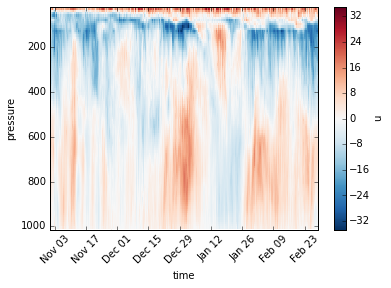

In [19]:
ds_int.u.T.plot()

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.setp(ax.get_xticklabels(), rotation=45)
ax.invert_yaxis()